# Decision Tree Algorithm on Diabetes dataset

<b> Load Dataset

In [1]:
#import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
#load dataset
data=pd.read_csv(r'C:\Users\santhosh\Downloads\diabetes.csv')
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [7]:
data.describe(include='all')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<b> Data Clean

In [8]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
data.duplicated().sum()

0

In [10]:
pre_value=data['Pregnancies'].value_counts()
pre_value

Pregnancies
1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: count, dtype: int64

<b> Exploratory Data Analysis

<Axes: xlabel='Pregnancies', ylabel='count'>

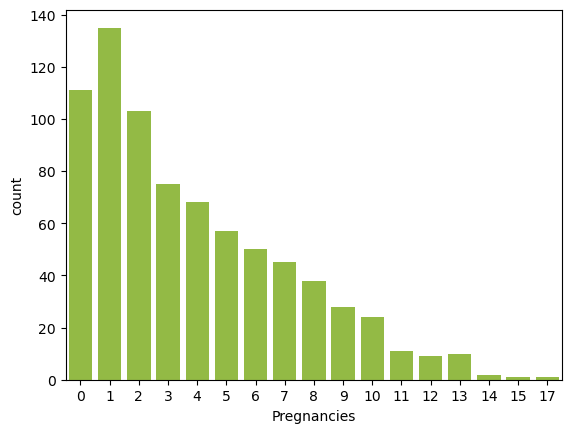

In [11]:
sns.countplot(data, x='Pregnancies', color='yellowgreen')

<Axes: xlabel='Pregnancies', ylabel='Count'>

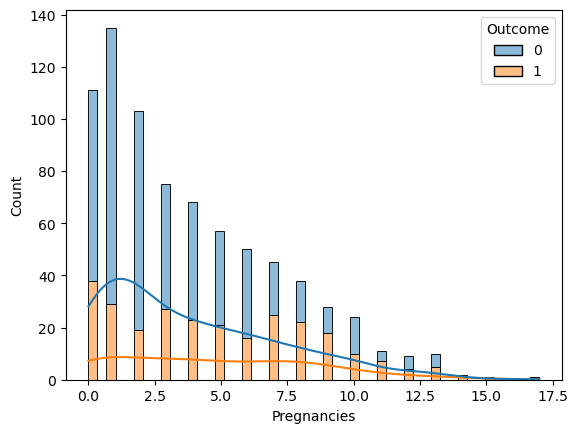

In [12]:
sns.histplot(data, x='Pregnancies', hue='Outcome', multiple='stack', bins=50, kde=True)

<b>model building

In [13]:
#split dataset in features and target variable

X = data.drop(['Outcome'], axis=1)

y = data['Outcome']

In [14]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [15]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

<b> Train-Test split

In [16]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [17]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((514, 8), (254, 8))

In [18]:
# check data types in X_train

X_train.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
dtype: object

<b>Applying Algorithm

In [19]:
# import DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier
# instantiate the DecisionTreeClassifier model with criterion gini index

DTree = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=0)


# fit the model
DTree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=0)

In [20]:
y_pred = DTree.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [21]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with criterion gini index: 0.7598


In [22]:
# Create a confusion matrix
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[144,  24],
       [ 37,  49]], dtype=int64)

<Axes: >

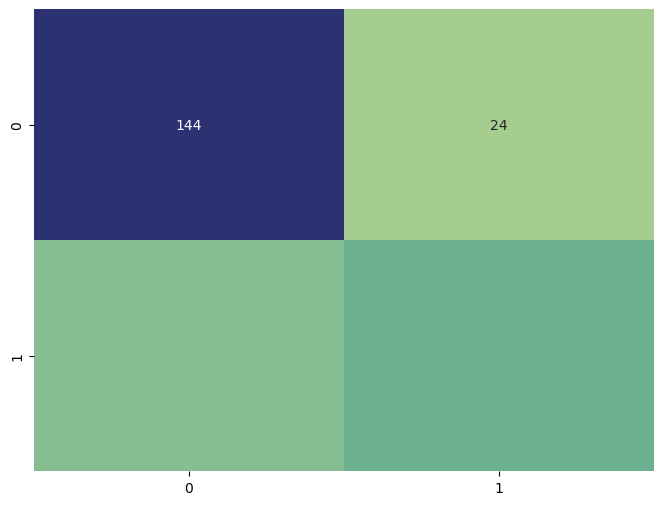

In [23]:
# Display the confusion matrix using Seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='crest', cbar=False)

<b>Predicted Values

In [24]:
# Create a classification report
from sklearn.metrics import classification_report
class_report = classification_report(y_test, y_pred)
print(class_report)

              precision    recall  f1-score   support

           0       0.80      0.86      0.83       168
           1       0.67      0.57      0.62        86

    accuracy                           0.76       254
   macro avg       0.73      0.71      0.72       254
weighted avg       0.75      0.76      0.75       254



<b> Decision Tree PLotting

[Text(0.5335365853658537, 0.9166666666666666, 'x[1] <= 154.5\ngini = 0.457\nsamples = 514\nvalue = [332, 182]'),
 Text(0.2804878048780488, 0.75, 'x[7] <= 30.5\ngini = 0.382\nsamples = 432\nvalue = [321, 111]'),
 Text(0.12195121951219512, 0.5833333333333334, 'x[1] <= 127.5\ngini = 0.24\nsamples = 251\nvalue = [216, 35]'),
 Text(0.07317073170731707, 0.4166666666666667, 'x[5] <= 45.45\ngini = 0.153\nsamples = 203\nvalue = [186, 17]'),
 Text(0.04878048780487805, 0.25, 'x[0] <= 6.5\ngini = 0.13\nsamples = 200\nvalue = [186, 14]'),
 Text(0.024390243902439025, 0.08333333333333333, 'gini = 0.122\nsamples = 199\nvalue = [186, 13]'),
 Text(0.07317073170731707, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.0975609756097561, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.17073170731707318, 0.4166666666666667, 'x[2] <= 55.0\ngini = 0.469\nsamples = 48\nvalue = [30, 18]'),
 Text(0.14634146341463414, 0.25, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.19512

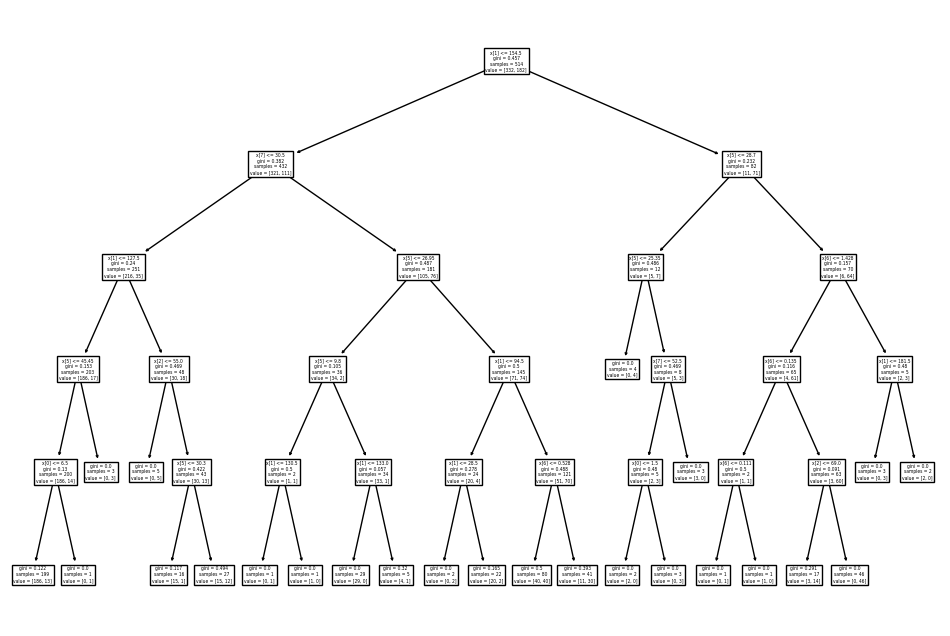

In [25]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(DTree.fit(X_train, y_train))